<a href="https://colab.research.google.com/github/Vanapar/tf-data-analysis-stat-task1-example/blob/main/%D0%A8%D0%B0%D0%B1%D0%BB%D0%BE%D0%BD_%D0%B4%D0%BB%D1%8F_%D0%BF%D1%80%D0%BE%D0%B5%D0%BA%D1%82%D0%B0_%D0%BF%D0%BE_AB_%D1%82%D0%B5%D1%81%D1%82%D0%B0%D0%BC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Шаблон для проекта по A/B - тестам.

### `chat_id ` из Телеграма:

------------------

##  <ins>Задание 1.</ins>

### 0. Запосить у бота в Телеграме условие командой `/get_project1_desc`.

### 1. Необходимо выбрать метрику и привести аргументацию.

Я считаю, что здесь стоит применить метрику NPV, так как с помощью данной метрики можно оценить оба способа продажи, далее мы сравнивавем и получаем результат о выгоде от продаж.

### 2. Альтернатива в критерии.

Будем использовать одностороннюю альтернативу, так как нам нужно определить только разницу в прибыли, также мы уменьшаем вероятность ложноположительных результатов.

### 3.1. Каков размер выборки? Привести аргументацию и написать как получилось то или иное число.

Формула для односторонней альтернативы представлена ниже

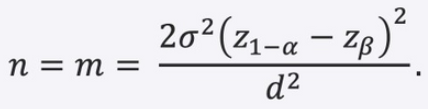

сиигма квадрат - выборочная дисперсия

z - квантиль распределения

d - MDE

In [2]:
import pandas as pd
from scipy import stats
import seaborn as sns

# Данные
df = pd.read_csv('hist_telesales.csv', sep=',')

# Данные из условия
alpha = 0.05
uplift = 0.05
beta = 0.2 # 1 - 0.8

# Среднее NPV
npv_mean = df.NPV.mean() #281.45

# Минимальный ожидаемый эффект — это наименьший истинный эффект полученный от изменений, 
# который с уверенностью сможет обнаружить статистический критерий.
mde = uplift * npv_mean # 14.07

# Дисперсия
var = df.NPV.var() # 459229.7

# Размер выборки:
n = (2 * var * (stats.norm.ppf(0.95) - stats.norm.ppf(0.2))**2) / mde ** 2 # 2867

FileNotFoundError: ignored

### 3.2. Необходимо запросить у бота в Телеграме выборку полученного размера командой `/get_project1_sample {размер выборки}` и вписать <ins>код выборки</ins>:

### 4. Принятие решения. Расписать подробно с аргументами.

------------------

##  <ins>Задание 2.</ins>

### 0. Запосить у бота в Телеграме условие командой `/get_project2_desc`.

Контекст
ЦБ смягчило правило,
ограничивающее варианты продажи услуги.
Мы хотим попробовать
более агрессивную продажу услуги,
но боимся,
что это повлияет на экономику основного продукта (КК)
из-за негатива клиентов.

Тест
Мы проводим тест,
в рамках которого мы разбиваем весь поток
на две части рановероятно,
где одной части (контролю) 
мы будем предлагать услугу текущим способом,
а второй части (тесту) 
- новым более агрессивным способом.
Целью этого теста 
является увеличение доходности КК + услуги.

Статистические вводные
Проверка однородности выбранного параметра
осуществяется с уровнем значимости 2%.

Уровень значимости 5%.
Мы хотели бы различать 3%-ное
изменение целевой метрики
с вероятностью 85%.

### 1. Необходимо выбрать метрику и привести аргументацию.

Я считаю, что здесь стоит применить метрику NPV, так как с помощью данной метрики можно оценить оба способа продажи, далее мы сравнивавем и получаем результат о выгоде от продаж.

### 2. Альтернатива в критерии.

Будем использовать одностороннюю альтернативу, так как нам нужно определить только разницу в прибыли, также мы уменьшаем вероятность ложноположительных результатов.

### 3. Нужно выбрать параметр(-ы), влияющий(-ие) на целевую метрику. Привести аргументацию.

Найдем самый влияющий на целевую метрику параметр, будем выбирать из доступных до заявки человека, корреляция Спирмена подойдёт.

In [66]:
print(
    df.NPV.corr(data['Возраст'],method='spearman'), 
    df.NPV.corr(data['Флаг утилизации счёта'],method='spearman'), 
    df.NPV.corr(data['Вероятность банкротства'], method='spearman'))

0.006404489801010866 0.7582683550341586 -0.15008798233638915


Выбираем флаг утилизации счёта

### 4.1. Каков размер выборки? Привести аргументацию и написать как получилось то или иное число.

Формула для односторонней альтернативы представлена ниже

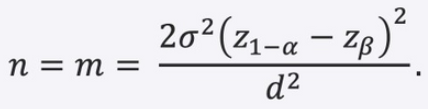

сиигма квадрат - выборочная дисперсия

z - квантиль распределения

d - MDE

### 4.2. Необходимо запросить у бота в Телеграме выборку полученного размера командой `/get_project2_sample {размер выборки}` и вписать <ins>код выборки</ins>: 5471

In [65]:
import pandas as pd
from scipy import stats
import seaborn as sns

data = pd.read_csv('hist_credit_card.csv')
mde = 0.03 * data.NPV.mean()
n = (2 * data.NPV.var() * (stats.norm.ppf(0.95) - stats.norm.ppf(0.15))**2) / (0.03 * data.NPV.mean()) ** 2 

In [67]:
 int(n + (0.5 if n > 0 else -0.5))

103221

### 5. Проверка на однородность, применение критерия. Принятие решения. Расписать подробно с аргументами.

<Axes: xlabel='Флаг утилизации счёта', ylabel='Count'>

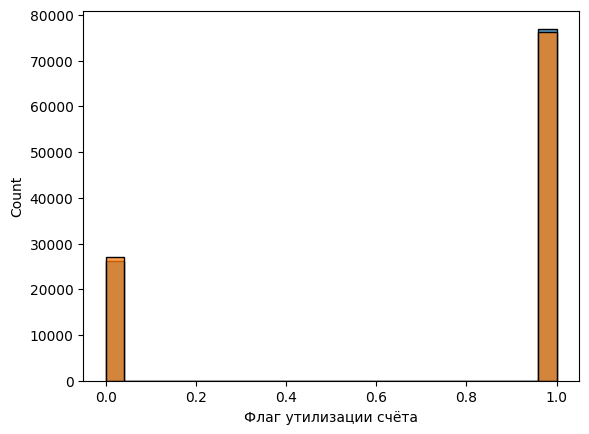

In [68]:
control = pd.read_csv('control_2.csv')
test = pd.read_csv('test_2.csv')

sns.histplot(data=control,x=control['Флаг утилизации счёта'])
sns.histplot(data=test,x=test['Флаг утилизации счёта'])

Так как распределения примерно равны, то проведем тест Андерсона-Дарлинга

In [69]:
from scipy.stats import anderson_ksamp

x = control['Флаг утилизации счёта'].values
y = test['Флаг утилизации счёта'].values

value = anderson_ksamp([x, y]).significance_level

if value < 0.02:
  print('Выборки не имеют разное распределение')
else:
  print('Выборки имеют разное распределение')

Выборки не имеют разное распределение


<ipython-input-69-767709e63d56>:6: UserWarning: p-value floored: true value smaller than 0.001
  value = anderson_ksamp([x, y]).significance_level


Из вышенаписанного следует, что выборки однородны

<Axes: ylabel='Count'>

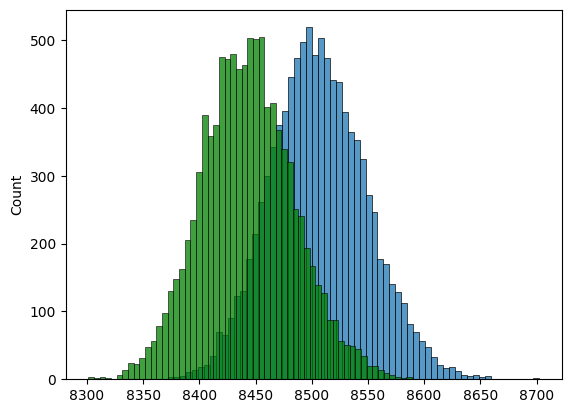

In [73]:
control_mean = []
test_mean = []

for i in range(10000):
    control_0 = control.NPV.sample(frac=1, replace=True)
    test_0 = test.NPV.sample(frac=1, replace=True)
    control_mean.append(control_0.mean())
    test_mean.append(test_0.mean())
    
sns.histplot(control_mean)
sns.histplot(test_mean, color = 'green')

На графике четко видно отклонение распределения тестовой выборки влево, что говорит нам о возможном снижении дохода, но это следует проверить t-тестом

In [72]:
value = stats.ttest_ind(control.NPV, test.NPV)[1]
if value < 0.05: 
  print('Новый способ успешен')
else: 
  print('Новый способ не принес увеличения доходности')

Новый способ не принес увеличения доходности


Как итог, можно сказать, что новая агрессивная кампания по продаже не принесла роста доходности
